In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test

/Users/justinpeter/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mean = pd.read_csv("../data/raw/mean.csv",index_col=[0])
median = pd.read_csv("../data/raw/median.csv",index_col=[0])
mode = pd.read_csv("../data/raw/mode.csv",index_col=[0])
iterative = pd.read_csv("../data/raw/iterative.csv",index_col=[0])

In [3]:
mean['Gender'].replace([0.0,1.0],['F','M'],inplace=True)
median['Gender'].replace([0.0,1.0],['F','M'],inplace=True)
mode['Gender'].replace([0.0,1.0],['F','M'],inplace=True)
iterative['Gender'].replace([0.0,1.0],['F','M'],inplace=True)

In [4]:
kmf = KaplanMeierFitter() # 'Haemoglobin','Albumin',
x1 = mean['Iron'] 
y1 = mean['Class']
x2 = median['Iron'] 
y2 = median['Class']
x3 = mode['Iron'] 
y3 = mode['Class']
x4 = iterative['Iron'] 
y4 = iterative['Class']

In [5]:
kmf1 = kmf.fit(x1,y1)
kmf2 = kmf.fit(x2,y2)
kmf3 = kmf.fit(x3,y3)
kmf4 = kmf.fit(x4,y4)

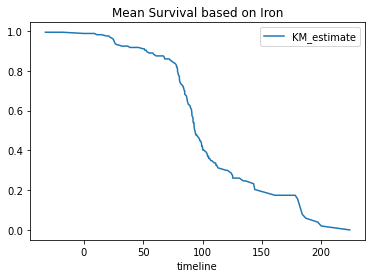

In [6]:
kmf1.survival_function_.plot()
plt.title('Mean Survival based on Iron');

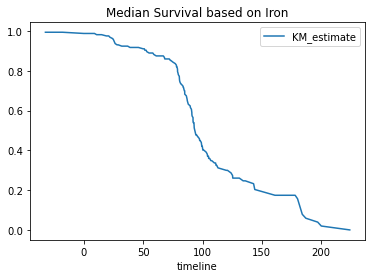

In [7]:
kmf2.survival_function_.plot()
plt.title('Median Survival based on Iron');

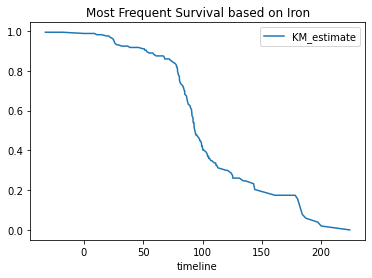

In [8]:
kmf3.survival_function_.plot()
plt.title('Most Frequent Survival based on Iron');

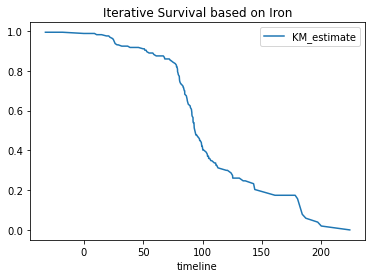

In [9]:
kmf4.survival_function_.plot()
plt.title('Iterative Survival based on Iron');

In [10]:
kmfn = [kmf1,kmf2,kmf3,kmf4]
ci = []
for i in kmfn:
    print(i.median_survival_time_)
    b = median_survival_times(i.confidence_interval_)
    ci.append(b)
print(ci)

94.0
94.0
94.0
94.0
[     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    91.0              100.028535,      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    91.0              100.028535,      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    91.0              100.028535,      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    91.0              100.028535]


In [11]:
kmf1.median_survival_time_

94.0

In [12]:
median_survival_times(kmf1.confidence_interval_)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,91.0,100.028535


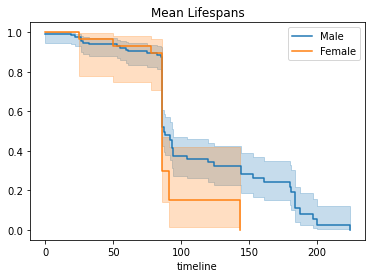

In [13]:
ax = plt.subplot(111)

gender = (mean["Gender"] == "M")

kmf1.fit(x1[gender], event_observed=y1[gender], label="Male")
kmf1.plot(ax=ax)

kmf1.fit(x1[~gender], event_observed=y1[~gender], label="Female")
kmf1.plot(ax=ax)

plt.title("Mean Lifespans");

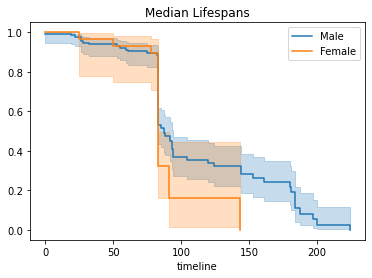

In [14]:
ax = plt.subplot(111)

gender = (median["Gender"] == "M")

kmf2.fit(x2[gender], event_observed=y2[gender], label="Male")
kmf2.plot(ax=ax)

kmf2.fit(x2[~gender], event_observed=y2[~gender], label="Female")
kmf2.plot(ax=ax)

plt.title("Median Lifespans");

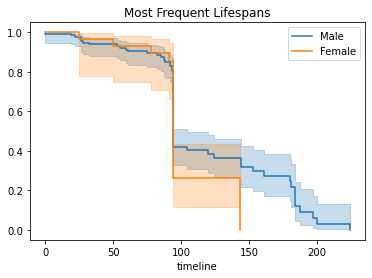

In [15]:
ax = plt.subplot(111)

gender = (mode["Gender"] == "M")

kmf3.fit(x3[gender], event_observed=y3[gender], label="Male")
kmf3.plot(ax=ax)

kmf3.fit(x3[~gender], event_observed=y3[~gender], label="Female")
kmf3.plot(ax=ax)

plt.title("Most Frequent Lifespans");

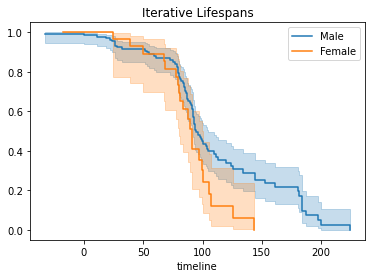

In [16]:
ax = plt.subplot(111)

gender = (iterative["Gender"] == "M")

kmf4.fit(x4[gender], event_observed=y4[gender], label="Male")
kmf4.plot(ax=ax)

kmf4.fit(x4[~gender], event_observed=y4[~gender], label="Female")
kmf4.plot(ax=ax)

plt.title("Iterative Lifespans");

In [17]:
results1 = logrank_test(x1[gender], x1[~gender], y1[gender], y1[~gender], alpha=.99)
results2 = logrank_test(x2[gender], x2[~gender], y2[gender], y2[~gender], alpha=.99)
results3 = logrank_test(x3[gender], x3[~gender], y3[gender], y3[~gender], alpha=.99)
results4 = logrank_test(x4[gender], x4[~gender], y4[gender], y4[~gender], alpha=.99)
results = [results1,results2,results3,results4]
for i in results:
    print(i.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.24 0.04      4.66

None


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.05 0.04      4.50

None


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.36 0.24      2.04

None


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.08 0.02      5.37

None
